# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

if weather_api_key == 'YOUR KEY HERE!':
    print('-------------')
    print('-------------')
    print('')
    print('NOTE: You need to enter your API keys into the api_keys.py file')
    print('for this script to execute')
    print('')
    print('-------------')    
    print('-------------')


## Generate Cities List

In [37]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
#lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
#lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
# for testing, let's use fewer cities
lats = np.random.uniform(lat_range[0], lat_range[1], size=100)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=100)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print('here is the number of cities: ' + str(len(cities)))
#print(type(cities))
#cities


here is the number of cities: 84


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [39]:
# let's play with the API and JSON:
# set our test api endpoint:
url = 'http://api.openweathermap.org/data/2.5/weather?'
# units = 'metric' # instructions say F degrees (and not F Troop)
units = 'imperial' # set this to get temps in F and wind speed in MPH
# build a partial query URL:
query_url = f"{url}appid={weather_api_key}&units={units}&q="

# create list for our current temp of each city
temp = []
humid = [] # returns in % no conversion needed
cloud = [] # returns in % no conversion needed
wind = [] # returns in meters/sec
city_name = []
city_id = []
city_lat = []
city_lng = []
city_date = []
country = []

# Loop through each city and get temp
for city in cities:
    response = requests.get(query_url + city).json()
    try:
        #print(response['main'])
        temp_now = response['main']['temp']
        humid_now = response['main']['humidity']
        cloud_now = response['clouds']['all']
        wind_now = response['wind']['speed']
        city_now = response['id']
        
        temp.append(response['main']['temp'])
        humid.append(response['main']['humidity'])
        cloud.append(response['clouds']['all'])
        wind.append(response['wind']['speed'])
        city_id.append(response['id'])
        city_lat.append(float(response['coord']['lat']))
        city_lng.append(float(response['coord']['lon']))
        city_date.append(response['dt'])
        country.append(response['sys']['country'])
        city_name.append(city)


        #print(f"city id: {city_now} city: {city} temp: {temp_now} humidity: {humid_now} windspeed: {wind_now} cloud %: {cloud_now}")
        #print(f"city id: {city_now} city: {city} city_lat: {city_lat} city_lng: {city_lng}")
        #print(f"city: {city} city_lat: {city_lat} city_lng: {city_lng} lat type: {type(city_lat)} ")
        print(f"processing city: {city} ID: {city_now}")
    except:
        print('----> Something not found, skipping <----')
        pass

print('------------')
print('--> DONE! <---')
print('------------')
    
# add a test row where humidity is > 100 to drop later as a test    
temp.append(20)
humid.append(101)
cloud.append(3)
wind.append(5)
city_id.append(6)
city_lat.append(12)
city_lng.append(5)
city_date.append(12)
country.append('DOH')
city_name.append('Foo')    
    

----> Something not found, skipping <----
processing city: ushuaia ID: 3833367
----> Something not found, skipping <----
processing city: yellowknife ID: 6185377
----> Something not found, skipping <----
processing city: barrow ID: 5880054
processing city: santa maria ID: 3450083
processing city: qaqortoq ID: 3420846
processing city: mataura ID: 6201424
processing city: rikitea ID: 4030556
processing city: khatanga ID: 2022572
----> Something not found, skipping <----
processing city: port alfred ID: 964432
processing city: norman wells ID: 6089245
processing city: kieta ID: 2094027
processing city: puerto ayora ID: 3652764
processing city: jamestown ID: 5122534
processing city: college ID: 5859699
processing city: avarua ID: 4035715
processing city: busselton ID: 2075265
processing city: bonavista ID: 5905393
processing city: noumea ID: 2139521
processing city: hualmay ID: 3939761
processing city: sierra vista ID: 5314328
processing city: whitianga ID: 2179103
processing city: new nor

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [41]:
weather_data = {'City Name': city_name, 'City ID': city_id, 
               'country': country, 'Temperature': temp,
               'Humidity': humid, 'Cloudiness': cloud, 'Wind Speed': wind,
               'Lat': city_lat, 'Lng': city_lng, 'Date': city_date}
weather_data_df = pd.DataFrame(weather_data)
#print(weather_data_df)
# if we want to drop rows where humidity > 100, uncomment the line below
# turns out later, we want this data according to the instructions
weather_data_no_humid_df = weather_data_df[weather_data_df.Humidity < 101]
weather_data_no_humid_df.head()

,City Name,City ID,country,Temperature,Humidity,Cloudiness,Wind Speed,Lat,Lng,Date
0,ushuaia,3833367,AR,37.40,87,40,21.85,-54.8000,-68.3000,1619656810
1,yellowknife,6185377,CA,24.42,54,20,16.11,62.4560,-114.3525,1619656684
2,barrow,5880054,US,19.40,86,90,8.05,71.2906,-156.7887,1619656728
3,santa maria,3450083,BR,53.60,94,0,1.14,-29.6842,-53.8069,1619656901
4,qaqortoq,3420846,GL,37.40,81,75,10.36,60.7167,-46.0333,1619656919


,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,5.990000e+02
mean,19.877028,19.568998,69.794808,69.353923,51.569282,7.979416,1.593605e+09
std,33.262944,91.418472,15.678452,22.704698,35.405602,5.660694,5.738815e+01
min,-54.800000,-179.170000,12.200000,7.000000,0.000000,0.360000,1.593605e+09
25%,-8.540000,-61.210000,59.000000,55.000000,20.000000,3.620000,1.593605e+09
50%,24.370000,24.670000,73.110000,75.000000,59.000000,6.730000,1.593605e+09
75%,46.585000,102.255000,80.600000,87.000000,85.000000,11.050000,1.593605e+09
max,78.220000,179.320000,116.600000,100.000000,100.000000,42.500000,1.593605e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
# this step done above, though right below the instructions want this again
# so why remove it, he wonders...

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,5.500000e+02
mean,19.973545,17.124400,58.331400,67.890909,52.141818,8.544800,1.585764e+09
std,33.284840,91.595451,25.795297,20.864881,35.766469,6.078869,5.539674e+01
min,-54.800000,-179.170000,-11.340000,9.000000,0.000000,0.160000,1.585764e+09
25%,-8.077500,-64.627500,42.800000,55.000000,20.000000,4.525000,1.585764e+09
50%,23.630000,19.635000,64.940000,72.000000,57.000000,7.325000,1.585764e+09
75%,48.672500,97.350000,78.800000,83.000000,86.750000,11.410000,1.585764e+09
max,78.220000,179.320000,102.200000,100.000000,100.000000,46.080000,1.585764e+09


In [47]:
#  Get the indices of cities that have humidity over 100%.
weather_data_big_humid_df = weather_data_df[weather_data_df.Humidity > 100]
weather_data_big_humid_df

,City Name,City ID,country,Temperature,Humidity,Cloudiness,Wind Speed,Lat,Lng,Date
78,Foo,6,DOH,20.0,101,3,5.0,12.0,5.0,12


In [35]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
print('---> I\'ve already done this.  It\'s called weather_data_df')
weather_data_df.head()

---> I've already done this.  It's called weather_data_df


,City Name,City ID,country,Temperature,Humidity,Cloudiness,Wind Speed,Lat,Lng,Date
0,punta arenas,3874787,CL,41.00,87,75,26.46,-53.1500,-70.9167,1619654865
1,mukhen,2019718,RU,51.10,54,58,10.31,48.1000,136.1000,1619654866
2,santa isabel do rio negro,3662489,BR,73.63,98,99,3.62,-0.4139,-65.0192,1619654866
3,ushuaia,3833367,AR,39.20,93,75,21.85,-54.8000,-68.3000,1619654818
4,tiksi,2015306,RU,26.37,90,49,7.25,71.6872,128.8694,1619654867


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

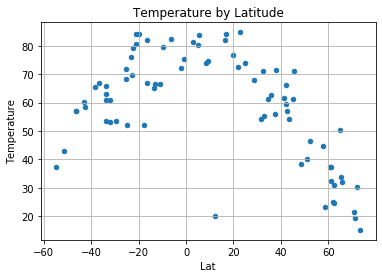

In [44]:
# scatter plot time!
weather_data_df.plot(kind="scatter", x="Lat", y="Temperature", grid=True,
              title="Temperature by Latitude")
plt.ylabel('Temperature')
plt.show()

## Latitude vs. Humidity Plot

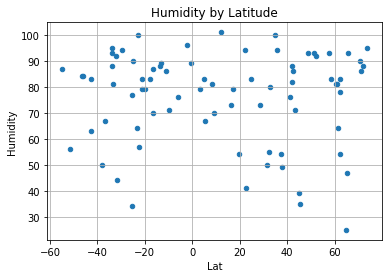

In [46]:
# scatter plot time!
weather_data_df.plot(kind="scatter", x="Lat", y="Humidity", grid=True,
              title="Humidity by Latitude")
plt.ylabel('Humidity')
plt.show()

## Latitude vs. Cloudiness Plot

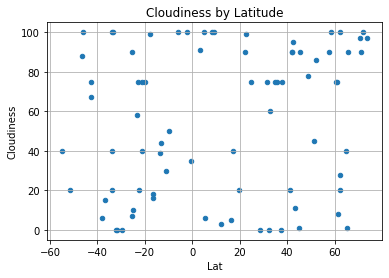

In [48]:
# scatter plot time!
weather_data_df.plot(kind="scatter", x="Lat", y="Cloudiness", grid=True,
              title="Cloudiness by Latitude")
plt.ylabel('Cloudiness')
plt.show()

## Latitude vs. Wind Speed Plot

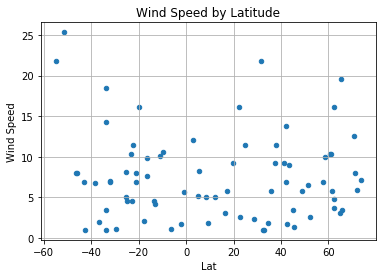

In [49]:
# scatter plot time!
weather_data_df.plot(kind="scatter", x="Lat", y="Wind Speed", grid=True,
              title="Wind Speed by Latitude")
plt.ylabel('Wind Speed')
plt.show()

## Linear Regression

In [52]:
# separate the data into north and south
data_north_df = weather_data_df[weather_data_df.Lat > 0 ]
data_south_df = weather_data_df[weather_data_df.Lat < 0 ]
#data_north_df
#data_south_df
print('--- Done! ---')

--- Done! ---


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

---> should we show r value?


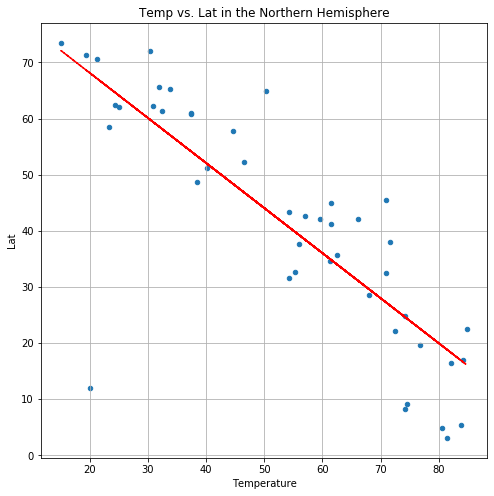

In [70]:
# Let's do our linear regression on temp vs. latitude in the North
x_data = data_north_df['Temperature']
y_data = data_north_df['Lat']
data_slope, data_int, data_r, data_p, data_std_err = linregress(x_data, y_data)
# create our line equation
data_fit = data_slope * x_data + data_int
# Create a scatter plot 
data_north_df.plot(kind="scatter", x="Temperature", y="Lat", grid=True, figsize=(8,8),
              title="Temp vs. Lat in the Northern Hemisphere")
#plt.ylabel('Average Tumor Volume (mm3)')
plt.plot(x, data_fit, '--', color='red')
print('---> should we show r value?')
plt.show()
#x

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

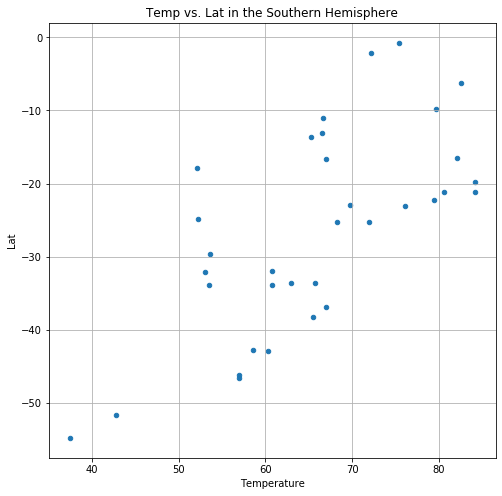

In [69]:
# Let's do our linear regression on temp vs. latitude in the South
x_data = data_south_df['Temperature']
y_data = data_south_df['Lat']
data_slope, data_int, data_r, data_p, data_std_err = linregress(x_data, y_data)
# create our line equation
data_fit = data_slope * x_data + data_int
# Create a scatter plot 
data_south_df.plot(kind="scatter", x="Temperature", y="Lat", grid=True, figsize=(8,8),
              title="Temp vs. Lat in the Southern Hemisphere")
#plt.ylabel('A label here')
#plt.plot(x, data_fit, '--', color='red')
plt.show()
#print(x)
#y

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

---> should we show r value?


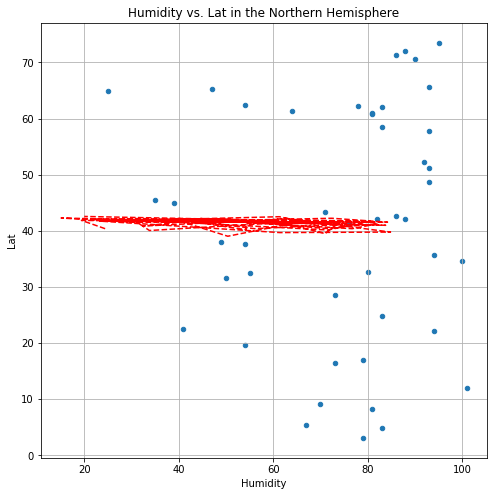

In [71]:
# Let's do our linear regression on humidity vs. latitude in the North
x_data = data_north_df['Humidity']
y_data = data_north_df['Lat']
data_slope, data_int, data_r, data_p, data_std_err = linregress(x_data, y_data)
# create our line equation
data_fit = data_slope * x_data + data_int
# Create a scatter plot 
data_north_df.plot(kind="scatter", x="Humidity", y="Lat", grid=True, figsize=(8,8),
              title="Humidity vs. Lat in the Northern Hemisphere")
#plt.ylabel('A label here')
plt.plot(x, data_fit, '--', color='red')
print('---> should we show r value?')
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

---> should we show r value?


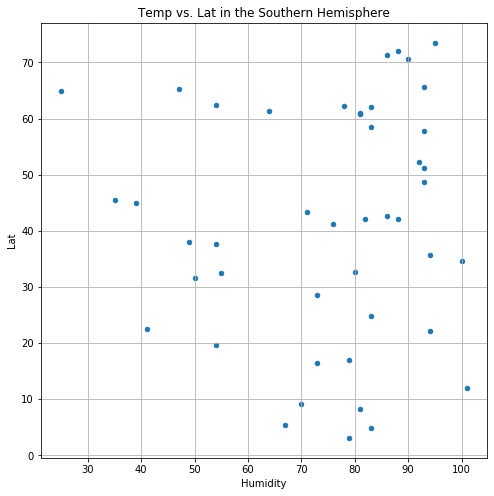

In [73]:
# Let's do our linear regression on temp vs. latitude in the North
x_data = data_south_df['Humidity']
y_data = data_south_df['Lat']
data_slope, data_int, data_r, data_p, data_std_err = linregress(x_data, y_data)
# create our line equation
data_fit = data_slope * x_data + data_int
# Create a scatter plot 
data_north_df.plot(kind="scatter", x="Humidity", y="Lat", grid=True, figsize=(8,8),
              title="Temp vs. Lat in the Southern Hemisphere")
#plt.ylabel('Average Tumor Volume (mm3)')
#plt.plot(x, data_fit, '--', color='red')
print('---> should we show r value?')
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

---> should we show r value?


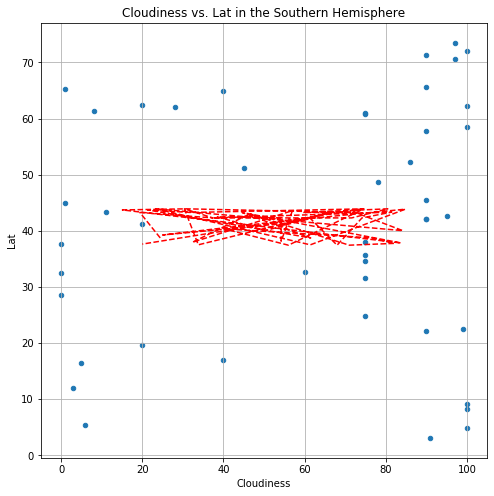

In [76]:
# Let's do our linear regression on Cloudiness vs. latitude in the North
x_data = data_north_df['Cloudiness']
y_data = data_north_df['Lat']
data_slope, data_int, data_r, data_p, data_std_err = linregress(x_data, y_data)
# create our line equation
data_fit = data_slope * x_data + data_int
# Create a scatter plot 
data_north_df.plot(kind="scatter", x="Cloudiness", y="Lat", grid=True, figsize=(8,8),
              title="Cloudiness vs. Lat in the Southern Hemisphere")
#plt.ylabel('A label here')
plt.plot(x, data_fit, '--', color='red')
print('---> should we show r value?')
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0035263772085582894


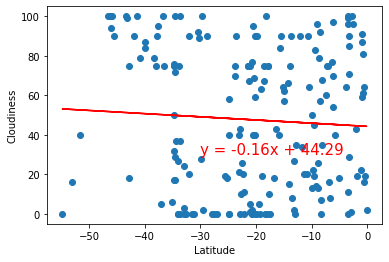

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

---> should we show r value?


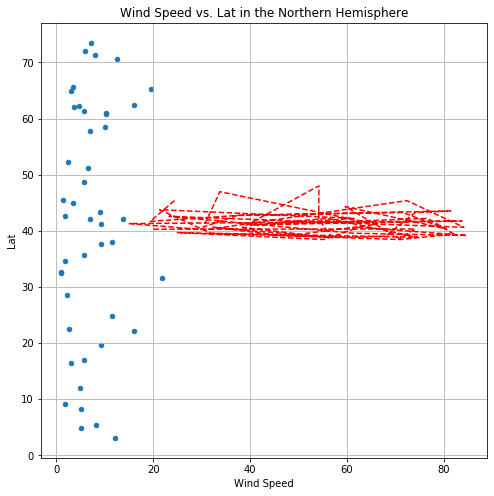

In [77]:
# Let's do our linear regression on wind speed vs. latitude in the North
x_data = data_north_df['Wind Speed']
y_data = data_north_df['Lat']
data_slope, data_int, data_r, data_p, data_std_err = linregress(x_data, y_data)
# create our line equation
data_fit = data_slope * x_data + data_int
# Create a scatter plot 
data_north_df.plot(kind="scatter", x="Wind Speed", y="Lat", grid=True, figsize=(8,8),
              title="Wind Speed vs. Lat in the Northern Hemisphere")
#plt.ylabel('A label here')
plt.plot(x, data_fit, '--', color='red')
print('---> should we show r value?')
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.017128274759839232


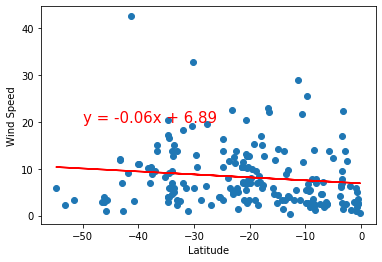